In [56]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
gc = pd.read_csv('german_data.txt', delimiter=' ')

In [3]:
gc.head()

,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1.1
0,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
1,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
2,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
3,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
4,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1


In [4]:
gc_targets = gc['1.1']

In [5]:
gc_data = gc.drop(['1.1'], axis=1)

In [6]:
gc_data.head()

,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4.1,A121,67,A143,A152,2,A173,1,A192,A201
0,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
1,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
2,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
3,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201
4,A14,36,A32,A46,9055,A65,A73,2,A93,A101,4,A124,35,A143,A153,1,A172,2,A192,A201


In [7]:
gc_targets.head()

0    2
1    1
2    1
3    2
4    1
Name: 1.1, dtype: int64

In [8]:
gc_data.A11 = gc_data.A11.apply(lambda x: int(x[1:3]))
gc_data.A34 = gc_data.A34.apply(lambda x: int(x[1:3]))
gc_data.A43 = gc_data.A43.apply(lambda x: int(x[1:3]))
gc_data.A65 = gc_data.A65.apply(lambda x: int(x[1:3]))
gc_data.A75 = gc_data.A75.apply(lambda x: int(x[1:3]))
gc_data.A93 = gc_data.A93.apply(lambda x: int(x[1:3]))
gc_data.A101 = gc_data.A101.apply(lambda x: int(x[1:4]))
gc_data.A121 = gc_data.A121.apply(lambda x: int(x[1:4]))
gc_data.A143 = gc_data.A143.apply(lambda x: int(x[1:4]))
gc_data.A152 = gc_data.A152.apply(lambda x: int(x[1:4]))
gc_data.A173 = gc_data.A173.apply(lambda x: int(x[1:4]))
gc_data.A192 = gc_data.A192.apply(lambda x: int(x[1:4]))
gc_data.A201 = gc_data.A201.apply(lambda x: int(x[1:4]))

In [9]:
gc_data.head()

,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4.1,A121,67,A143,A152,2,A173,1,A192,A201
0,12,48,32,43,5951,61,73,2,92,101,2,121,22,143,152,1,173,1,191,201
1,14,12,34,46,2096,61,74,2,93,101,3,121,49,143,152,1,172,2,191,201
2,11,42,32,42,7882,61,74,2,93,103,4,122,45,143,153,1,173,2,191,201
3,11,24,33,40,4870,61,73,3,93,101,4,124,53,143,153,2,173,2,191,201
4,14,36,32,46,9055,65,73,2,93,101,4,124,35,143,153,1,172,2,192,201


In [10]:
cross_val_score(DecisionTreeClassifier(max_depth=1), gc_data, gc_targets, cv=5, scoring='accuracy').mean()

0.69969849246231153

In [11]:
import pydotplus
from IPython.display import Image
from sklearn import tree

In [22]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(gc_data,gc_targets)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

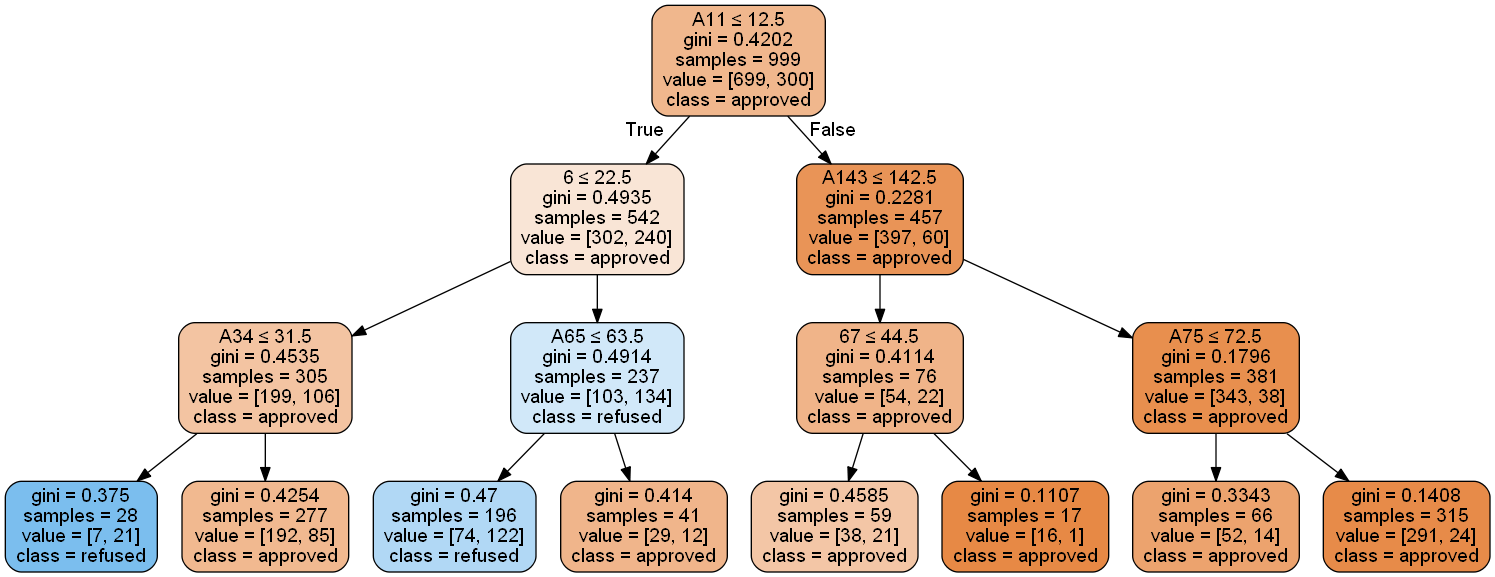

In [23]:
dot_data = tree.export_graphviz(clf, out_file="my_tree.dot", 
                         feature_names=gc_data.columns,  
                         class_names=['approved','refused'],  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graphviz.graph_from_dot_file("my_tree.dot")  
Image(graph.create_png())

класс заявок с отрицательным результатом появляется у клиентов, для которых:

1)нет существующих счетов в банках, либо сумма на них невелика. При этом планируемая длительность выплаты кредита>22.5, а накопления(Savings account/bonds)<750 в среднем.

2)нет существующих счетов в банках, либо сумма на них невелика. При этом длительность периода выплат кредита<22.5, а кредитная история указывает на наличие других кредитов, либо на задержки в выплате предыдущих.


In [85]:
depth = []
score = []
for k in range(1,np.shape(gc_data)[0]):
    if k<100:
        if k%2 == 0:
            clf = DecisionTreeClassifier(max_depth=k)
            score.append(round(cross_val_score(clf,gc_data,gc_targets,cv = 5,n_jobs=-1).mean(), 3))
            depth.append(k)
    else:
        if k%3 == 0:
            clf = DecisionTreeClassifier(max_depth=k)
            score.append(round(cross_val_score(clf,gc_data,gc_targets,cv = 5,n_jobs=-1).mean(), 3))
            depth.append(k)

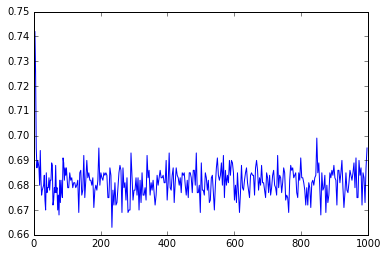

In [90]:
plt.xlabel = 'Depth'
plt.ylabel = 'cv_scores'
plt.plot(depth, score)
plt.show()